<h1>Data Cleansing</h1>

<h3>Data Train Cleansing</h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
dtrain = pd.read_csv("train.csv") 
dtest = pd.read_csv("test.csv")

In [4]:
dtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
dtrain.shape

(1460, 81)

In [7]:
dtest.shape

(1459, 80)

In [8]:
NaN = pd.concat([dtest.isna().sum(), dtrain.isna().sum(), dtrain.dtypes], axis=1, keys=['test','train','type data'])
NaN[NaN.sum(axis=1)>0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\3345703882.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NaN[NaN.sum(axis=1)>0]


,test,train,type data
MSZoning,4.0,0,object
LotFrontage,227.0,259,float64
Alley,1352.0,1369,object
Utilities,2.0,0,object
Exterior1st,1.0,0,object
Exterior2nd,1.0,0,object
MasVnrType,16.0,8,object
MasVnrArea,15.0,8,float64
BsmtQual,44.0,37,object
BsmtCond,45.0,37,object


In [9]:
missing = dtrain.isnull().sum()
missing = missing[missing > 0]

In [10]:
list_missing = np.array(missing.index)
list_missing = list_missing.tolist()
list_missing.remove('LotFrontage')
list_missing

['Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
dtrain_bersih = dtrain.copy()
dtrain_bersih[list_missing] = dtrain[list_missing].fillna(0)
dtrain_bersih['LotFrontage'] = dtrain_bersih['LotFrontage'].fillna(dtrain_bersih['LotFrontage'].mean())

In [12]:
missing = dtrain_bersih.isnull().sum()
missing = missing[missing > 0]
print('NAN = ', missing.sum())

NAN =  0


In [13]:
dtrain_bersih.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
numeric = dtrain_bersih.select_dtypes(include=[np.number])
numeric = (numeric.columns).tolist()

In [18]:
q1 = dtrain_bersih[numeric].quantile(0.25)
q3 = dtrain_bersih[numeric].quantile(0.75)

JAK = q3-q1
batas_atas = q3 + .5*JAK
batas_bawah = q1 - .5*JAK

dtrain_bersih = dtrain_bersih.drop(dtrain_bersih[(dtrain_bersih[numeric] > batas_atas) | (dtrain_bersih[numeric] < batas_bawah)].index)


<AxesSubplot:>

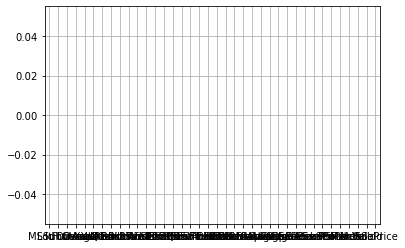

In [19]:
dtrain_bersih.boxplot(numeric)

In [ ]:
nonnum = dtrain_bersih.select_dtypes(include=object)
list_nonnum = np.array(nonnum.columns)
list_nonnum.shape

In [ ]:
list_nonnum = list_nonnum.tolist()
list_nonnum

In [ ]:
dtrain_bersih = pd.get_dummies(dtrain_bersih, prefix = list_nonnum)

In [ ]:
correlation = dtrain_bersih.corr()
print(correlation['SalePrice'].sort_values(ascending=False))

In [ ]:
dtrain_bersih.head()

<h3>Data Test Cleansing</h3>

In [ ]:
missing = dtest.isnull().sum()
missing = missing[missing > 0]
missing

In [ ]:
list_missing = np.array(missing.index)
list_missing = list_missing.tolist()
list_missing.remove('LotFrontage')
list_missing

In [ ]:
dtest_bersih = dtest.copy()
dtest_bersih[list_missing] = dtest[list_missing].fillna(0)
dtest_bersih['LotFrontage'] = dtest_bersih['LotFrontage'].fillna(dtest_bersih['LotFrontage'].mean())

In [ ]:
missing = dtest_bersih.isnull().sum()
missing = missing[missing > 0]
print('missing = ', missing.sum())

In [ ]:
dtest_bersih.head()

In [ ]:
numeric = dtest_bersih.select_dtypes(include=[np.number])
numeric = (numeric.columns).tolist()

In [ ]:
q1 = dtest_bersih[numeric].quantile(0.25)
q3 = dtest_bersih[numeric].quantile(0.75)

JAK = q3-q1
batas_atas = q3 + .5*JAK
batas_bawah = q1 - .5*JAK

dtrain_bersih = dtrain_bersih.drop(dtes_bersih[(dtest_bersih[numeric] > batas_atas) | (dtest_bersih[numeric] < batas_bawah)].index)


In [ ]:
dtest_bersih.boxplot(numeric)

In [ ]:
dtest_bersih.shape

In [ ]:
nonnum = dtest_bersih.select_dtypes(include=object)
list_nonnum = np.array(nonnum.columns)
list_nonnum.shape

In [ ]:
list_nonnum = list_nonnum.tolist()
list_nonnum

In [ ]:
dtest_bersih = pd.get_dummies(dtest_bersih, prefix = list_nonnum)
dtest_bersih.shape

## EDA 


In [ ]:
# CHECK DISTIRBUSI NORMAL DENGAN SKEWNERS dan KURT 
sns.distplot(dtrain['SalePrice'], fit = norm) ;

(mu,sigma) = norm.fit(dtrain['SalePrice'])
plt.legend([' Normal Distribusi : ($\mu = $ {:.2f} and $\sigma = $ {:.2f}'.format(mu,sigma)], loc = 'best')

fig = plt.figure()
res = stats.probplot(dtrain['SalePrice'], plot= plt)
plt.show()

print("Skewness: %f" % dtrain['SalePrice'].skew())
print("Kurtosis: %f" % dtrain['SalePrice'].kurt())

In [ ]:
# jika dilihat distirbusi tersebut lebih ke arah kanan yang dimana berarti tidak terdisribusi maka kita harus buat menjadi distirbusi normal dengan cara : 
dtrain['SalePrice'] = np.log1p(dtrain['SalePrice'])

sns.distplot(dtrain['SalePrice'], fit = norm) ;

(mu,sigma) = norm.fit(dtrain['SalePrice'])
plt.legend([' Normal Distribusi : ($\mu = $ {:.2f} and $\sigma = $ {:.2f}'.format(mu,sigma)], loc = 'best')

fig = plt.figure()
res = stats.probplot(dtrain['SalePrice'], plot= plt)
plt.show()

print("Skewness: %f" % dtrain['SalePrice'].skew())
print("Kurtosis: %f" % dtrain['SalePrice'].kurt())

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'YrSold', y='SalePrice', data=dtrain, estimator=np.median)
plt.title("Median For Year Sales")
plt.xlabel('Selling Year')
plt.ylabel("Median Of Price")
plt.show()

In [ ]:
numeric = dtrain.select_dtypes(include=[np.number])
numeric.columns

In [ ]:
corr_numer = numeric.corr()
print(corr_numer['SalePrice'].sort_values(ascending=False), '\n')

In [ ]:
k = 11 
colom = corr_numer.nlargest(k,'SalePrice')['SalePrice'].index 
cm = np.corrcoef(dtrain[colom].values.T)
f, ax= plt.subplots(figsize=(14,12))
sns.heatmap(cm,xticklabels=colom.values,yticklabels=colom.values,linewidths=0.01,vmax=.8,square=True, annot=True,cmap='viridis')

In [ ]:
# DARI OVERALQUAL DAN SALE PRICE KITA LIHAT BOXPLOTNYA KARENA DIA MEMPUNYAI CORR YANG BERHUBUNGAN
fig1 = fig.add_subplot
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = dtrain[['SalePrice', 'OverallQual']])

In [ ]:
# DARI GRIVV AREA dan SALE PRICE KITA BIKIN SCATTER PLOT KARENA MEMPUNYAI CORR yang berhubungan yaitu 0,7 
sns.scatterplot(x = dtrain.GrLivArea, y = dtrain.SalePrice, hue=dtrain.OverallQual, palette= 'Spectral')